# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 40px; color: #2D2926; text-align: center; line-height: 0.55;background-color: #E94B3C"><b>Telco Customer Churn Classification</b><br></h1>

<center>
    <img src="https://usercontent.one/wp/www.alltopeverything.com/wp-content/uploads/2021/08/telecommunications-3840285_1280.jpg?media=1659724391" alt="Telco Customer Churn" width="50%">
</center>

### Notebook Contents :
- Data Information
- Feature Engineering
- Modeling
- Conclusion

# <center><div style="font-family: Trebuchet MS; background-color: #E94B3C; color: #2D2926; padding: 12px; line-height: 1;">Dataset Information</div></center>

### Import the Necessary Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- The dataset has too many features with text data and are probably categorical features!
- **Total Charges** is a feature with numerical values but are stored in string datatype. First, we will convert this column into float.

In [8]:
# Converting DataFrame column elements from string to float using the following code line :
# data['TotalCharges'] = data['TotalCharges'].astype(float)

l1 = [len(i.split()) for i in data['TotalCharges']]
l2 = [i for i in range(len(l1)) if l1[i] != 1]
print('Index Positions with empty spaces : ',*l2)

for i in l2:
    data.loc[i,'TotalCharges'] = data.loc[(i-1),'TotalCharges']
    
data['TotalCharges'] = data['TotalCharges'].astype(float)
data.drop(columns = ['customerID'], inplace = True)

Index Positions with empty spaces :  488 753 936 1082 1340 3331 3826 4380 5218 6670 6754


- While converting the **TotalCharges** to float, an error occurred with the message describing that it could not convert string to float.
- This message popped up because of the empty strings present in the above displayed index positions of the **TotalCharges** column. As these elements were defined as string, they did not appear as **Null** values and hence the heatmap for missing values did not display anything.
    - **E.g** : a = ' ' 
- Hence, we split the individual elements of **TotalCharges** and store the index values of the elements whose splitted string length is not equal to 1.
- This created a list with index numbers of the empty strings which are filled with their preceding value and finally the entire column is converted into float using astype function. 
- We drop the **customerID** column as well!
- Let's divide the features into **numerical** and **categorical** features.
- We will also execute the label encoding transformation for **categorical features**.

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = data.copy(deep = True)
text_data_features = [i for i in list(data.columns) if i not in list(data.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


- We creating a deep copy of the orginal dataset and label encoding the text data.
- Modifications in the original dataset will not be highlighted in this deep copy.
- Hence, we use this deep copy of dataset that has all the features converted into numerical values for visualization & modeling purposes.
- We now again the descriptive stats of the data.

In [10]:
df1.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00
mean,0.50,0.16,0.48,0.30,32.37,0.90,0.94,0.87,0.79,0.91,0.90,0.80,0.99,0.99,0.69,0.59,1.57,64.76,2285.17,0.27
std,0.50,0.37,0.50,0.46,24.56,0.30,0.95,0.74,0.86,0.88,0.88,0.86,0.89,0.89,0.83,0.49,1.07,30.09,2267.54,0.44
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.25,18.80,0.00
25%,0.00,0.00,0.00,0.00,9.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,35.50,401.68,0.00
50%,1.00,0.00,0.00,0.00,29.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,2.00,70.35,1398.25,0.00
75%,1.00,0.00,1.00,1.00,55.00,1.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,1.00,2.00,89.85,3803.05,1.00
max,1.00,1.00,1.00,1.00,72.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,118.75,8684.80,1.00


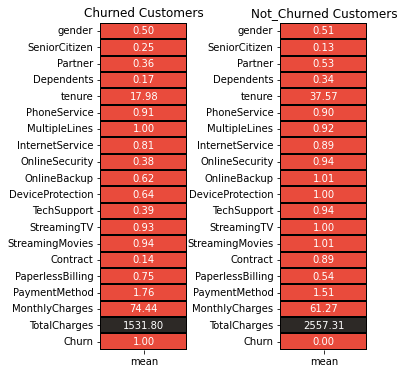

In [11]:
colors = ['#E94B3C','#2D2926']

churn = df1[df1['Churn'] == 1].describe().T
not_churn = df1[df1['Churn'] == 0].describe().T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Churned Customers');

plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Not_Churned Customers');

fig.tight_layout(pad = 0)

- **Mean** values of all the features for churned and not-churned customers.
- Clearly, the customers that churned had a low mean **tenure** of **17.98** months as compared to those who continued with an average **tenure** period of **37.57** months. 
- Mean values of **OnlineSecurity**, **OnlineBackup**, **DeviceProtection** and **TechSupport** are higher for not-churned customers than churn customers. This can serve as a good indicator or point to focus on!
- Churned customer's **Contract** value is much smaller than those of not-churned customers.
- Mean **MonthlyCharges** of the churn customers, **74.44**, is more than that of not-churn customers, **61.27**.
- Not-churned customers **TotalCharges**, **2557.31**, is higher than churn customers, **1531.80**.
- From these mean values, we can say that some of the features display a clear cut difference that can help to focus more churn customers to make sure they retain the services.
- The dataset has too many categorical features, hence mean values of the features are present in the vicinity of 0.

**We will now move on to the EDA section and look into the features with more detail!**

# <center><div style="font-family: Trebuchet MS; background-color: #E94B3C; color: #2D2926; padding: 12px; line-height: 1;">Feature Engineering</div></center>

In [ ]:
col = list(df1.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

### Data Scaling :

In [44]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1.drop(columns = ['MonthlyCharges_Group','TotalCharges_Group'], inplace = True)

df1['tenure'] = mms.fit_transform(df1[['tenure']])
df1['MonthlyCharges'] = mms.fit_transform(df1[['MonthlyCharges']])
df1['TotalCharges'] = mms.fit_transform(df1[['TotalCharges']])
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.01,0,1,0,0,2,0,0,0,0,0,1,2,0.12,0.00,0
1,1,0,0,0,0.47,1,0,0,2,0,2,0,0,0,1,0,3,0.39,0.22,0
2,1,0,0,0,0.03,1,0,0,2,2,0,0,0,0,0,1,3,0.35,0.01,1
3,1,0,0,0,0.62,0,1,0,2,0,2,2,0,0,1,0,0,0.24,0.21,0
4,0,0,0,0,0.03,1,0,1,0,0,0,0,0,0,0,1,2,0.52,0.02,1


- Machine learning model does not understand the units of the values of the features. It treats the input just as a simple number but does not understand the true meaning of that value. Thus, it becomes necessary to scale the data.

**Eg :** Age = Years; FastingBS = mg / dl; Charges = Currency 

- We have 2 options for data scaling : 1) **Normalization** 2) **Standardization**. As most of the algorithms assume the data to be normally (Gaussian) distributed, **Normalization** is done for features whose data does not display normal distribution and **standardization** is carried out for features that are normally distributed where their values are huge or very small as compared to other features.


- **Normalization** : **tenure**, **MonthlyCharges** and **TotalCharges** features are normalized as they displayed a right skewed and bimodal data distribution.


- **Standardization** : None of the features are standardized for the above data.

### Correlation Matrix :

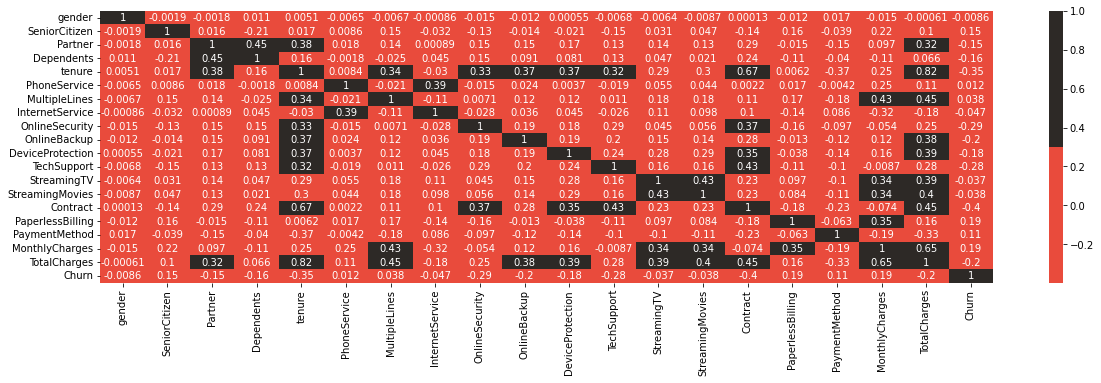

In [45]:
plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(),cmap = colors,annot = True);

- It is a huge matrix with too many features. We will check the correlation only with respect to **Churn**. 

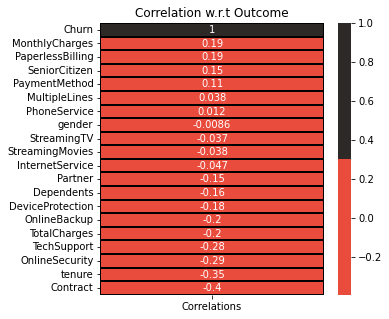

In [46]:
corr = df1.corrwith(df1['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Outcome');

- **MulipleLines**, **PhoneService**, **gender**, **StreamingTV**, **StreamingMovies** and **InternetService** does not display any kind of correlation. We drop the features with correlation coefficient between **(-0.1,0.1)**.
- Remaining features either display a significant **positive or negative correlation**.

### Feature Selection for Categorical Features :

In [47]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif

#### Chi-Squared Test :

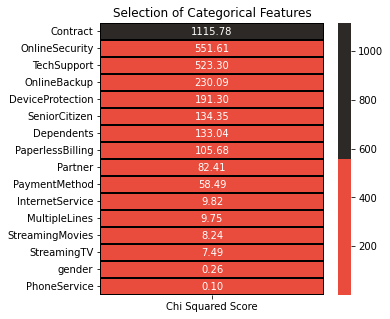

In [48]:
features = df1.loc[:,categorical_features]
target = df1.loc[:,'Churn']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

- **PhoneService**, **gender**, **StreamingTV**, **StreamingMovies**, **MultipleLines** and **InternetService** display a very low relation with **Churn**.

### Feature Selection for Numerical Features :

In [49]:
from sklearn.feature_selection import f_classif

#### ANOVA Test :

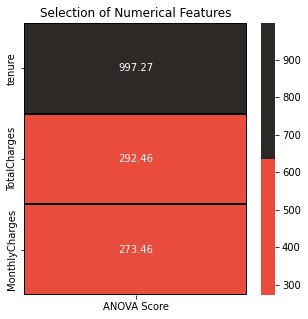

In [50]:
features = df1.loc[:,numerical_features]
target = df1.loc[:,'Churn']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

- According to the **ANOVA test**, **higher the value of the ANOVA score, higher the importance of the feature**.
- From the above results, we need to include all the numerical features for modeling.

In [51]:
df1.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'],inplace = True)
df1.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0.01,0,2,0,0,0,1,2,0.12,0.00,0
1,0,0,0,0.47,2,0,2,0,1,0,3,0.39,0.22,0
2,0,0,0,0.03,2,2,0,0,0,1,3,0.35,0.01,1
3,0,0,0,0.62,2,0,2,2,1,0,0,0.24,0.21,0
4,0,0,0,0.03,0,0,0,0,0,1,2,0.52,0.02,1


**We will now move onto data balancing!**

### Data Balancing using SMOTE :

- In order to cope with unbalanced data, there are 2 options :

    - **Undersampling** : Trim down the majority samples of the target variable.
    - **Oversampling** : Increase the minority samples of the target variable to the majority samples.
    
    
- After doing trial-error with undersampling & oversampling, we have decided to go with oversampling!
- For data balancing, we will use **imblearn**.
    - **pip statement** : pip install imbalanced-learn

In [52]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [53]:
over = SMOTE(sampling_strategy = 1)

f1 = df1.iloc[:,:13].values
t1 = df1.iloc[:,13].values

f1, t1 = over.fit_resample(f1, t1)
Counter(t1)

Counter({0: 5174, 1: 5174})

# <center><div style="font-family: Trebuchet MS; background-color: #E94B3C; color: #2D2926; padding: 12px; line-height: 1;">Modeling</div></center>

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [55]:
x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.20, random_state = 2)

- Selecting the features from the above conducted tests and splitting the data into **80 - 20 train - test** groups.

In [56]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

#### 1] Xgboost Classifier :

In [57]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

Cross Validation Score :  90.17%
ROC_AUC Score :  82.63%


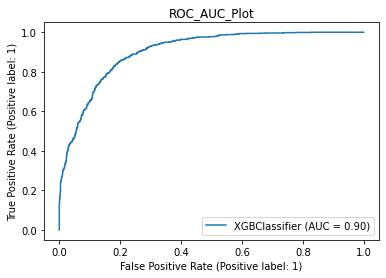

In [58]:
model(classifier_xgb,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1040
           1       0.80      0.86      0.83      1030

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



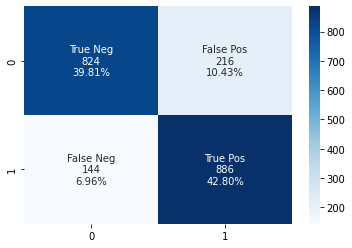

In [59]:
model_evaluation(classifier_xgb,x_test,y_test)

#### 2] LightGBM Classifier :

In [60]:
from lightgbm import LGBMClassifier

classifier_lgbm = LGBMClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

Cross Validation Score :  90.33%
ROC_AUC Score :  82.87%


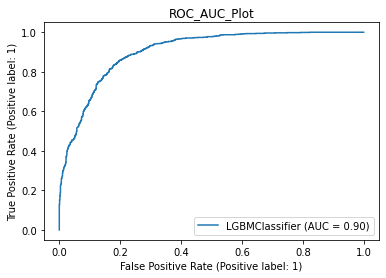

In [61]:
model(classifier_lgbm,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1040
           1       0.80      0.87      0.83      1030

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



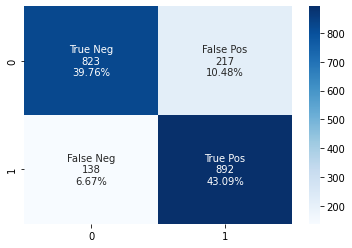

In [62]:
model_evaluation(classifier_lgbm,x_test,y_test)

#### 3] Random Forest Classifier :

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

Cross Validation Score :  85.69%
ROC_AUC Score :  79.12%


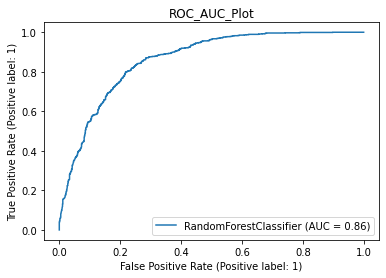

In [65]:
model(classifier_rf,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.84      0.72      0.78      1040
           1       0.75      0.86      0.80      1030

    accuracy                           0.79      2070
   macro avg       0.80      0.79      0.79      2070
weighted avg       0.80      0.79      0.79      2070



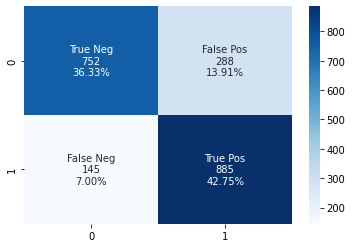

In [66]:
model_evaluation(classifier_rf,x_test,y_test)

#### 4] Decision Tree Classifier :

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

Cross Validation Score :  84.29%
ROC_AUC Score :  76.53%


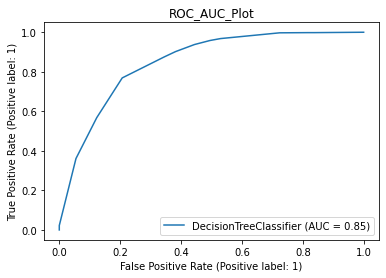

In [69]:
model(classifier_dt,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.84      0.66      0.74      1040
           1       0.72      0.87      0.79      1030

    accuracy                           0.76      2070
   macro avg       0.78      0.77      0.76      2070
weighted avg       0.78      0.76      0.76      2070



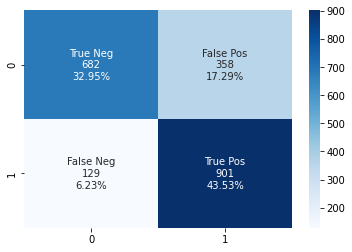

In [70]:
model_evaluation(classifier_dt,x_test,y_test)

#### 5] Stack of XGBClassifier, LightGBMClassifier, Random Forest Classifer & Decision Tree Classifier :

In [71]:
from sklearn.ensemble import StackingClassifier

stack = StackingClassifier(estimators = [('classifier_xgb',classifier_xgb),
                                         ('classifier_lgbm',classifier_lgbm),
                                         ('classifier_rf',classifier_rf),
                                         ('classifier_dt',classifier_dt)],
                           final_estimator = classifier_lgbm)

- For **stacking of classifiers**, we stack the above 4 classifiers :
    - **XGBClassifier**
    - **LightGBMClassifier**
    - **RandomForestClassifier**
    - **DecisionTreeClassifier**
- It has an important hyperparameter known as **final_estimator**. It is the classifier that makes the final prediction by using the predicted classes by the various classifier and predicts the final output. 

Cross Validation Score :  90.88%
ROC_AUC Score :  83.01%


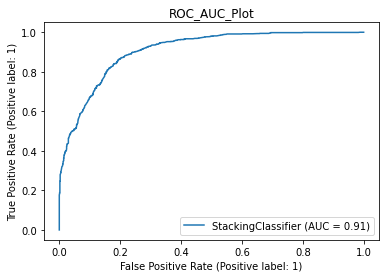

In [72]:
model(stack,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1040
           1       0.82      0.85      0.83      1030

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



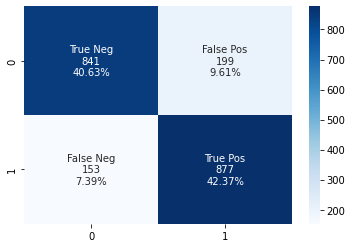

In [73]:
model_evaluation(stack,x_test,y_test)

# <center><div style="font-family: Trebuchet MS; background-color: #E94B3C; color: #2D2926; padding: 12px; line-height: 1;">Algorithm Results Table</div></center>

|Sr. No.|ML Algorithm|Cross Validation Score|ROC AUC Score|F1 Score (Churn)|
|-|-|-|-|-|
|1|XGBClassifier|90.17%|82.63%|83%|
|2|LightGBMClassifier|90.33%|82.87%|83%|
|3|RandomForestClassifier|85.69%|79.12%|80%|
|4|DecisionTreeClassifier|84.29%|76.53%|79%|
|5|Stack of All 4 Classifiers|90.88%|83.01%|83%|

# <center><div style="font-family: Trebuchet MS; background-color: #E94B3C; color: #2D2926; padding: 12px; line-height: 1;">Measures for Reducing Customer Churn & Revenue Increase</div></center>

### <center>FIRST IMPRESSION IS THE LAST IMPRESSION!</center>

-  3 types of customers should be targeted : **SeniorCitizen**, Living with a **Partner**, living all alone!

- The number of **SeniorCitizen** customers are low but their lowerlimit of **MonthlyCharges** is higher than the other customers. Thus, **SeniorCitizen** customers are ready to pay top dollar but they need to catered with that level of service. For customers with a **Partner** as well as customers living alone, they prefer services with **MonthlyCharges** below 65. 

- Inorder to create a strong foundation of customers, Telco Company needs to create an easy and affordable entry point for their services. For the **tenure** of 1st 6 months, it needs to focus extensively on **OnlineSecurity**, **OnlineBackup**, **DeviceProtection** & **TechSupport** as this period is the most critical and uncertain for the customers. They must lower the churn tenure of **40 - 50** months for these services!.  

- Once they build a solid pipeline of support services for customers, they need to push the usage of **MultipleLines** & **Fiber Optic** cables for the **PhoneService** & **InternetService** respectively. But the major hurdle for these 2 services is the starting point of **75+** in **MonthlyCharges**.


- Thus, they need to create combinations of options provided for **PhoneService** & **InternetService** where average of these **MonthlyCharges** will be in the range of **100 - 120** :
    - **No MultipleLines** + **OpticFiber**
    - **MultipleLines** + **DSL**
- This will increase the mean income from a user as it completely drops the option of choosing a combination of **No MultipleLines + DSL** whose mean **MonthlyCharges** is probably **60 - 70**!


- **StreamingTV** and **StreamingMovies** need to be made affordable as well as reducing it's churn **tenure**. The content of these services should be targeting all types of customers. This needs to followed up with an easy and hassle free **PaymentMethod**.


- It needs to put an end to the **Electronic check** for payment purposes due to it's high churn and focus entirely on **Bank Transfer (automatic)** & **Credit Card (automatic)**! However, they will be challenged to reduce the median churn tenure of **above 20 months** for these 2 **PaymentMethod** which is double the churn tenure of **Electronic check**.


- Lower limit of **Electronic check** is around **60** whereas that of **Bank Transfer (automatic)** & **Credit Card (automatic)** is around **20** in **MonthlyCharges**. **PaperlessBilling** is another expensive feature with a starting point of 60 whereas the other options are cheap starting at **20** in **MonthlyCharges**.


- Once the **MonthlyCharges** for any single service hits the **70** mark, customers become very conscious about their **MonthlyCharges**. Quality of service needs to be the USP of the Telco Company! These measures will push the revenue as well as improve the current value delivery process! 

# <center><div style="font-family: Trebuchet MS; background-color: #E94B3C; color: #2D2926; padding: 12px; line-height: 1;">Conclusion</div></center>

- This is a great dataset that gives an opportunity to peak into the real world business problem and can be dealt with the Data Science techniues. 


- Insights gained from the EDA are very valuable for understanding the effectiveness of the existing systems that are in place. They also assist in drawing up plans & measures to counter the problems or be in an infinite loop fo improvement. 


- SMOTE analysis is used for data balancing. Combinations of undersampling and oversampling can be employed as well. Undersampling was tried out for this problem but it landed the F1 Score (Churn) in the range of 60 - 70 %. There are other data balancing methods available as well.


- When it comes to model performance, feature creation by combining features was carried out however, they did not outperform the current models. Hyperparamter tuning & outlier detection could also bump up the F1 Score (Churn) & Cross Validation Score. Stack of models pipped the XGBClassifier & LGBMClassifier by a margin of 0.01 for F1 Score (Churn).

### References :
- https://hockeystack.com/blog/average-customer-acquisition-cost-by-industry/
- https://www.klipfolio.com/resources/kpi-examples/call-center/subscriber-acquisition-cost
- https://www.zendesk.com/in/blog/customer-churn-rate/#georedirect
- https://www.profitwell.com/customer-churn/churn-prevention
- [Image Source](https://usercontent.one/wp/www.alltopeverything.com/wp-content/uploads/2021/08/telecommunications-3840285_1280.jpg?media=1659724391)